### Data Mining HW2
### Finished by Zhuo Wen
### Discussed with Yu Mo

In [1]:
import pandas as pd
data = pd.read_csv('count_data.csv',index_col=0)
data

,x
1,1
2,2
3,1
4,2
5,1
...,...
99996,6
99997,10
99998,5
99999,1


## Q1: Assuming xi ∼ Pois(λ), estimate λ with Maximum Likelihood Estimation (MLE).

<img src="Q1.jpg" width=450>

In [2]:
print("The MLE estimation of lambda is: ", data['x'].mean())

The MLE estimation of lambda is:  4.01576


## Q2: Assuming λ ∼ Gamma(α, β), estimate λ with Maximum A Posterior (MAP) and ﬁnd its posterior distribution.

<img src="Q2.jpg" width=450>

In [3]:
## Assume the initial alpha and beta here
alpha = 3
beta = 6
print("The posterior distribution of lanmda is still a Gamma distribution")
print("The MAP estimation of lambda is ", (data['x'].sum()+alpha-1)/(beta+len(data)))

The posterior distribution of lanmda is still a Gamma distribution
The MAP estimation of lambda is  4.015539067655941


## Q3: Finding the posterior distribution of λ given x1,...,xN/2, and compare it with the prior and the posterior given the full dataset.


<img src="Q3.jpg" width=450>

## Q4: Plot the predictive distribution of a new data xN+1 given x1,...,xN under the Poisson distribution model (hint: using the histogram of simulated random samples).

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma
from scipy.stats import poisson
plt.style.use('seaborn-darkgrid')

In [5]:
lambda_samples = gamma.rvs(data['x'].sum()+alpha, scale=1.0/(beta+len(data)), size=500)
x_pred = [poisson.mean(mu=lambda_s) for lambda_s in lambda_samples]

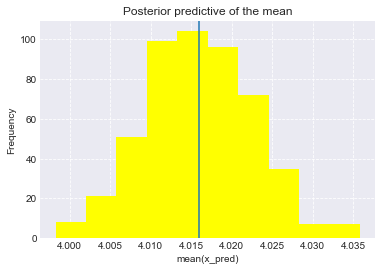

In [6]:
plt.hist(x_pred, color='yellow')
plt.title("Posterior predictive of the mean")
plt.ylabel("Frequency")
plt.grid(linestyle='--')
plt.xlabel("mean(x_pred)")
plt.axvline(np.mean(x_pred))
plt.show()

## Q5: Assume xi ∼ NegativeBinomial(r,p), where the PMF of Negative Binominal distribution with parameter r and p is deﬁned as p(k). Now assume r = 1, estimate p using MLE.

<img src="Q5.jpg" width=450>

In [7]:
print("The MLE estimation of p is: ", data['x'].sum()/(data['x'].sum()+len(data)))

The MLE estimation of p is:  0.8006284192226103


## Q6: Assume p ∼ Beta(a,b), estimate p with MAP and ﬁnd the posterior distribution of p.

<img src="Q6.jpg" width=450>

In [8]:
## Assume the initial a and b here
a = 3
b = 1.2
print("The posterior distribution of p is still a beta distribution")
print("The MAP estimation of p is ", (data['x'].sum()+a-1)/(data['x'].sum()+a+b+len(data)-2))

The posterior distribution of p is still a beta distribution
The MAP estimation of p is  0.800628894955961


## Q7: Plot the predictive distribution of a new data xN+1 given x1,...,xN under the negative binomial distribution model (hint: using the histogram of simulated random samples).

In [9]:
from scipy.stats import beta
from scipy.stats import nbinom
# Simulate the p
p_samples = beta.rvs(a=data['x'].sum()+a, b=b+len(data), size=500)
x_pred_1 = [nbinom.mean(n=1, p=1-p) for p in p_samples]

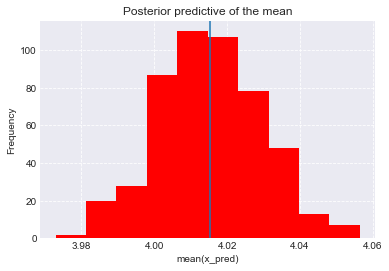

In [10]:
plt.hist(x_pred_1, color='red')
plt.title("Posterior predictive of the mean")
plt.ylabel("Frequency")
plt.grid(linestyle='--')
plt.xlabel("mean(x_pred)")
plt.axvline(np.mean(x_pred_1))
plt.show()